# <u> Final Project: Analysis on Credit Score

# 1. Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from IPython.display import Image  
import pydotplus
%pylab inline

import sklearn as sk
import sklearn.tree as tree

import warnings
warnings.filterwarnings('ignore')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\praka\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 2. Reading Dataset

In [4]:
df = pd.read_csv('train.csv')

In [5]:
#Making a copy of dataset
df2 = df.copy()
len(df2)

100000

## Data Description

The dataset has entries related to lot of Credit related information gathered for many years. We are trying to build a machine learning model to <b> classify the credit scores into the categories of Good, Standard and Poor. </b>

We will analyse the data to find conclusions on how one can improve his/her credit score.
    
Following are the variables that we have in our dataset

* <b>ID</b>: Represents a unique identification number of the entry

* <b>Customer_ID</b>: Represents a unique identification of the person

* <b>Month</b>: Represents the month of the entry

* <b>Name</b>: Represents the name of a person

* <b>Age</b>: Represents the age of the person

* <b>SSN</b>: Represents the social security number of a person (Unique identifier)

* <b>Occupation</b>: Represents the occupation of the person

* <b>Annual Income</b>: Represents the annual income of the

* <b>Monthly Inhand Salary</b>: Represents the monthly base salary of a person

* <b>Number of Bank Accounts</b>: Represents the number of bank accounts a person holds

* <b>Number of Credit Cards</b>: Represents the number of other credit cards held by a person

* <b>Interest Rate</b>: Represents the interest rate on credit card

* <b>Number of Loans</b>: Represents the number of loans taken from the bank

* <b>Types of Loan</b>: Represents the types of loan taken by a person

* <b>Delay from due date</b>: Represents the average number of day

* <b>Number of delayed payment</b>: Represents the average number of payments delayed by a person

* <b>Changed Credit Limit</b>: Represents the percentage change in credit card limit

* <b>Number of credit inquiries</b>: Represents the number of credit card inquiries

* <b>Credit Mix</b>: Represents the classification of the mix of credits

* <b>Outstanding Debt</b>: Represents the remaining debt to be paid (in USD)

* <b>Credit Utilization Ratio</b>: Represents the utilization ratio of credit card i.e the sum of bank balances divided by sum of credit limits

* <b>Credit History Age</b>: Represents the months of credit history the person has

* <b>Payment of Minimum Amount</b>: Represents whether the minimum amount was paid by the person or not

* <b>Total EMI per month</b>: Represents the amount of monthly EMI payments (in USD)

* <b>Amount invested monthly</b>: Represents the monthly amount invested by the customer (in USD)

* <b>Payment Behaviour</b>: Represents the payment behavior of the customer

* <b>Monthly Balance</b>: Represents the monthly balance amount of the customer (in USD)

# 3. Understanding the Data

In [6]:
df2.shape

(100000, 28)

The dataset contains 100,000 rows and 28 columns.

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

The above information of the dataset shows the number of null values in each column and the datatype of each column.

In [8]:
df2.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.000,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.000,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


In [9]:
df2.iloc[0]

ID                                                                     0x1602
Customer_ID                                                         CUS_0xd40
Month                                                                 January
Name                                                            Aaron Maashoh
Age                                                                        23
SSN                                                               821-00-0265
Occupation                                                          Scientist
Annual_Income                                                        19114.12
Monthly_Inhand_Salary                                                1824.843
Num_Bank_Accounts                                                           3
Num_Credit_Card                                                             4
Interest_Rate                                                               3
Num_of_Loan                                                     

In [10]:
col_list = df2.columns.to_list()

In [11]:
for i in col_list:
    print(i,':',df2[i].unique(),'\n')

ID : ['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed'] 

Customer_ID : ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c'] 

Month : ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'] 

Name : ['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks'] 

Age : ['23' '-500' '28_' ... '4808_' '2263' '1342'] 

SSN : ['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990'] 

Occupation : ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect'] 

Annual_Income : ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_'] 

Monthly_Inhand_Salary : [1824.84333333           nan 3037.98666667 ... 3097.00833333 1929.90666667
 3359.41583333] 

Num_Bank_Accounts : [   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  5

Credit_Utilization_Ratio : [26.82261962 31.94496006 28.60935202 ... 41.25552226 33.63820798
 34.19246265] 

Credit_History_Age : ['22 Years and 1 Months' nan '22 Years and 3 Months'
 '22 Years and 4 Months' '22 Years and 5 Months' '22 Years and 6 Months'
 '22 Years and 7 Months' '26 Years and 7 Months' '26 Years and 8 Months'
 '26 Years and 9 Months' '26 Years and 10 Months' '26 Years and 11 Months'
 '27 Years and 0 Months' '27 Years and 1 Months' '27 Years and 2 Months'
 '17 Years and 9 Months' '17 Years and 10 Months' '17 Years and 11 Months'
 '18 Years and 1 Months' '18 Years and 2 Months' '18 Years and 3 Months'
 '18 Years and 4 Months' '17 Years and 3 Months' '17 Years and 4 Months'
 '17 Years and 5 Months' '17 Years and 6 Months' '17 Years and 7 Months'
 '17 Years and 8 Months' '30 Years and 8 Months' '30 Years and 9 Months'
 '30 Years and 10 Months' '30 Years and 11 Months' '31 Years and 0 Months'
 '31 Years and 1 Months' '31 Years and 2 Months' '31 Years and 3 Months'
 '32 Year

In this dataset for every person we have one entry per month for about 7-8 months. 

<b>SSN and Customer ID </b> are unique identifiers which are further used for Data Cleaning Process. 

In few columns we have some data entry errors. Going further in Data cleaning we are deciding the range of the values in that column based on the value count results. 

# 4. Data Cleaning

#### Checking Null Values

In [12]:
df2.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [13]:
df2.isna().any().sum() 

8

 We have <b> 8 columns </b> that contains null values which must be cleaned. 

#### Removing Underscore from all the columns that have underscores with the values

In [14]:
df2['Num_of_Delayed_Payment'] = df2.Num_of_Delayed_Payment.str.strip('_')
df2['Monthly_Balance'] = df2.Monthly_Balance.str.strip('_')
df2['Amount_invested_monthly'] = df2.Amount_invested_monthly.str.strip('_')
df2['Annual_Income'] = df2.Annual_Income.str.strip('_')
df2['Num_of_Loan'] = df2.Num_of_Loan.str.strip('_')
df2['Changed_Credit_Limit'] = df2.Changed_Credit_Limit.str.strip('_')
df2['Outstanding_Debt'] = df2.Outstanding_Debt.str.strip('_')
df2['Age'] = df2.Age.str.strip('_')

#### Changing the existing numerical columns to it's actual Data type from string.

In [15]:
df2.Monthly_Balance = df2.Monthly_Balance.astype(float)
df2.Amount_invested_monthly = df2.Amount_invested_monthly.astype(float)
df2.Age = df2.Age.astype(int)

#### Updating the SSN column 

In [16]:
df2.SSN.unique()

array(['821-00-0265', '#F%$D@*&8', '004-07-5839', ..., '133-16-7738',
       '031-35-0942', '078-73-5990'], dtype=object)

#### We have some junk values in SSN

In [17]:
len(df2[df2.SSN == '#F%$D@*&8'])

5572

For cleaning SSN column, we are doing a group by function on Customer ID and SSN together taking the max of Monthly Inhand Salary, Num of credit Inquiries and mean of Amount invested monthly and monthly balance. In Monthly Inhand Salary and Num of credit Inquiries column for each customer ID for different months we either have nan or a value so we have taken the maximum.In Amount invested monthly and monthly balance column for each customer ID for different months we have nan and other values so we have taken the mean. 

In [18]:
#creating a temporary table for the groupby result
lookup = df2.groupby(['Customer_ID','SSN'],as_index = False).agg({'Monthly_Inhand_Salary':'max',\
                         'Num_Credit_Inquiries':'max', 'Monthly_Balance':'mean', 'Amount_invested_monthly':'mean'})\
                        .rename(columns = {'Monthly_Inhand_Salary':'MIS_Max', \
                         'Num_Credit_Inquiries':'NCI_Max','Monthly_Balance':'MB_Mean', 'Amount_invested_monthly':'AIM_Mean'})

In [19]:
df2[5:10][['Customer_ID','SSN']]

,Customer_ID,SSN
5,CUS_0xd40,821-00-0265
6,CUS_0xd40,821-00-0265
7,CUS_0xd40,#F%$D@*&8
8,CUS_0x21b1,004-07-5839
9,CUS_0x21b1,004-07-5839


In [20]:
# taking only correct SSN
lookup = lookup[lookup.SSN != '#F%$D@*&8']

In [21]:
#Merging the dataframes
df_ssn_update = df2.merge(lookup, left_on = 'Customer_ID', right_on = 'Customer_ID', how = 'left')

In [22]:
df_ssn_update[5:10][['Customer_ID','SSN_x','SSN_y']]

,Customer_ID,SSN_x,SSN_y
5,CUS_0xd40,821-00-0265,821-00-0265
6,CUS_0xd40,821-00-0265,821-00-0265
7,CUS_0xd40,#F%$D@*&8,821-00-0265
8,CUS_0x21b1,004-07-5839,004-07-5839
9,CUS_0x21b1,004-07-5839,004-07-5839


In [23]:
#Now SSN_y column has the correct SSN

In [24]:
df_ssn_update[df_ssn_update['SSN_y' ]== '#F%$D@*&8']

,ID,Customer_ID,Month,Name,Age,SSN_x,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,SSN_y,MIS_Max,NCI_Max,MB_Mean,AIM_Mean


In [25]:
#dropping SSN_x
df_ssn_update = df_ssn_update.drop(columns = ['SSN_x'],axis = 1)

In [26]:
len(df_ssn_update)

100000

In [27]:
#Replacing Nan value to 0 in some columns to use it for cleaning
df_ssn_update.Monthly_Inhand_Salary.replace(to_replace=NaN, value=0, inplace=True)
df_ssn_update.Num_Credit_Inquiries.replace(to_replace=NaN, value=0, inplace=True)
df_ssn_update.Monthly_Balance.fillna(0,inplace=True)
df_ssn_update.MB_Mean.fillna(0,inplace=True)

#### Updating the Monthly Inhand Salary

In [28]:
df_ssn_update['Monthly_Inhand_Salary'] = df_ssn_update.apply(lambda x: x.Monthly_Inhand_Salary \
                                                        if x.Monthly_Inhand_Salary > 0 else x.MIS_Max , axis = 1)

In [29]:
#dropping the added column
df_ssn_update = df_ssn_update.drop(columns = ['MIS_Max'],axis = 1)

#### Updating the Number of Credit Inquiries column

In [30]:
df_ssn_update['Num_Credit_Inquiries'] = df_ssn_update.apply(lambda x: x.Num_Credit_Inquiries \
                                                        if x.Num_Credit_Inquiries > 0 else x.NCI_Max , axis = 1)
#dropping the added column
df_ssn_update = df_ssn_update.drop(columns = ['NCI_Max'],axis = 1)

#### Replacing the Nan in No of Delayed payment column 

In [31]:
#Replace nan in this column with 0
df_ssn_update.Num_of_Delayed_Payment.fillna(0,inplace=True)

#### Updating the Monthly balance column

In [32]:
df_ssn_update['Monthly_Balance'] = df_ssn_update.apply(lambda x: x.Monthly_Balance \
                                                        if x.Monthly_Balance > 0 else x.MB_Mean , axis = 1)

In [33]:
#dropping the added column
df_ssn_update = df_ssn_update.drop(columns = ['MB_Mean'],axis = 1)

#### Updating the Amount_invested_monthly column

In [34]:
df_ssn_update['Amount_invested_monthly'] = df_ssn_update.apply(lambda x: x.Amount_invested_monthly \
                                                        if x.Amount_invested_monthly > 0 else x.AIM_Mean , axis = 1)

In [35]:
#dropping the added column
df_ssn_update = df_ssn_update.drop(columns = ['AIM_Mean'],axis = 1)

In [36]:
df_ssn_update.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
SSN_y                           0
dtype: int64

#### Now all the null values in the numeric columns are cleaned

In [37]:
df_ssn_update[df_ssn_update.Name == 'Langep'][['Customer_ID','Name']].drop_duplicates()

,Customer_ID,Name
16,CUS_0x2dbc,Langep
11872,CUS_0xaf95,Langep
44856,CUS_0x109d,Langep
53272,CUS_0x4854,Langep
61376,CUS_0xba1c,Langep
76872,CUS_0x7a96,Langep


Name is not the unique identifier so we are dropping name column

In [38]:
df_ssn_update = df_ssn_update.drop(columns = ['Name'],axis = 1)

In [39]:
#After cleaning numerical columns we are creating a copy of the cleaned dataframe
df_clean = df_ssn_update.copy()

In [40]:
len(df_clean)

100000

#### We have some data entry errors in age columns

In [41]:
df_clean.Age.min()
df_clean.Age.max()

-500

8698

In [42]:
df_clean[df_clean.Customer_ID == 'CUS_0xd40'][['Customer_ID','SSN_y','Age']]

,Customer_ID,SSN_y,Age
0,CUS_0xd40,821-00-0265,23
1,CUS_0xd40,821-00-0265,23
2,CUS_0xd40,821-00-0265,-500
3,CUS_0xd40,821-00-0265,23
4,CUS_0xd40,821-00-0265,23
5,CUS_0xd40,821-00-0265,23
6,CUS_0xd40,821-00-0265,23
7,CUS_0xd40,821-00-0265,23


In [43]:
# Creating a temp dataframe with correct ages
df_age = df_clean[((df_clean.Age).astype(int)>-1) & ((df_clean.Age).astype(int)<100)]

In [44]:
df_age = df_age[['SSN_y','Age']]

In [45]:
df_age.Age.min()
df_age.Age.max()

14

99

In [46]:
df_age = df_age.drop_duplicates()
df_age = df_age.drop_duplicates(subset = ['SSN_y'])

#### Updating the age column with crct age

In [47]:
df_clean = df_clean.merge(df_age, left_on = 'SSN_y', right_on = 'SSN_y', how = 'left')

In [48]:
df_clean['Age_x'] = df_clean.apply(lambda x: x.Age_y \
                                                        if ((x.Age_x > 100) | (x.Age_x <0)) else x.Age_x , axis = 1)

In [49]:
df_clean[df_clean.Customer_ID == 'CUS_0xd40'][['Customer_ID','SSN_y','Age_x','Age_y']]

,Customer_ID,SSN_y,Age_x,Age_y
0,CUS_0xd40,821-00-0265,23,23
1,CUS_0xd40,821-00-0265,23,23
2,CUS_0xd40,821-00-0265,23,23
3,CUS_0xd40,821-00-0265,23,23
4,CUS_0xd40,821-00-0265,23,23
5,CUS_0xd40,821-00-0265,23,23
6,CUS_0xd40,821-00-0265,23,23
7,CUS_0xd40,821-00-0265,23,23


In [50]:
#dropping and renaming the columns
df_clean = df_clean.drop(columns = ['Age_y'],axis = 1)
df_clean.rename(columns = {'Age_x':'Age'}, inplace = True)

In [51]:
#deleting the temporary table created
del(df_age)

#### Cleaning Payment Behavior column

In [52]:
df_clean['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [53]:
# taking only the correct payment behavior values
df_pb = df_clean[df_clean['Payment_Behaviour'] != '!@9#%8'][['SSN_y','Payment_Behaviour']]

In [54]:
df_pb.head(2)

,SSN_y,Payment_Behaviour
0,821-00-0265,High_spent_Small_value_payments
1,821-00-0265,Low_spent_Large_value_payments


In [55]:
df_pb = df_pb.drop_duplicates()
df_pb = df_pb.drop_duplicates(subset = ['SSN_y'])

#### Updating with correct values

In [56]:
df_clean= df_clean.merge(df_pb, left_on = 'SSN_y', right_on = 'SSN_y', how = 'left')

In [57]:
#Renaming and removing the columns 
df_clean.rename(columns = {'Payment_Behaviour_y':'Payment_Behaviour'}, inplace = True)
df_clean = df_clean.drop(columns = ['Payment_Behaviour_x'],axis = 1)

#### Now we are cleaning occupation column. we have some blanks in this column

In [58]:
df_clean.Occupation.unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

#### Creating a dummy dataframe with correct occupations

In [59]:
df_occu = df_clean[df_clean.Occupation!= '_______'][['SSN_y','Occupation']]

In [60]:
df_occu.Occupation.unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [61]:
df_occu = df_occu.drop_duplicates()
df_occu = df_occu.drop_duplicates(subset = ['SSN_y'])

#### Updating the occupation with correct occupation for each unique ssn

In [62]:
df_clean = df_clean.merge(df_occu, left_on = 'SSN_y', right_on = 'SSN_y', how = 'left')

In [63]:
#dropping and renaming extra columns
df_clean = df_clean.drop(columns = ['Occupation_x'],axis = 1)
df_clean.rename(columns = {'Occupation_y':'Occupation'}, inplace = True)

In [64]:
#deleting temp dataframe
del(df_occu) 

#### Now we have some underscore in credit mix column

In [65]:
df_clean.Credit_Mix.unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

#### Creating a dummy dataframe with correct values

In [66]:
df_cm = df_clean[df_clean.Credit_Mix!= '_'][['SSN_y','Credit_Mix']]

In [67]:
df_cm.Credit_Mix.unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [68]:
df_cm = df_cm.drop_duplicates()
df_cm = df_cm.drop_duplicates(subset = ['SSN_y'])

#### Updating correct values

In [69]:
df_clean = df_clean.merge(df_cm, left_on = 'SSN_y', right_on = 'SSN_y', how = 'left')

In [70]:
#removing and renaming columns
df_clean = df_clean.drop(columns = ['Credit_Mix_x'],axis = 1)
df_clean.rename(columns = {'Credit_Mix_y':'Credit_Mix'}, inplace = True)

In [71]:
del(df_cm) #deleting temporary columns

#### We have some empty rows in Changed_Credit_Limit

In [72]:
len(df_clean[df_clean.Changed_Credit_Limit == ''])

2091

#### Taking the correct values

In [73]:
df_ccl = df_clean[df_clean.Changed_Credit_Limit!= ''][['SSN_y','Changed_Credit_Limit']]

In [74]:
df_ccl = df_ccl.drop_duplicates()
df_ccl = df_ccl.drop_duplicates(subset = ['SSN_y'])

#### Updating the correct Changed_Credit_Limit values using SSN

In [75]:
df_clean = df_clean.merge(df_ccl, left_on = 'SSN_y', right_on = 'SSN_y', how = 'left')

In [76]:
#Dropping and Renaming columns
df_clean = df_clean.drop(columns = ['Changed_Credit_Limit_x'],axis = 1)
df_clean.rename(columns = {'Changed_Credit_Limit_y':'Changed_Credit_Limit'}, inplace = True)

In [77]:
len(df_clean[df_clean.Changed_Credit_Limit == ''])

0

In [78]:
del(df_ccl) #deleting temporary table

#### Credit history Age we have months and year. We are splitting the columns and converting it to total number of months

In [79]:
df_clean['Credit_History_Age'] = df_clean.Credit_History_Age.str.rstrip(' Months')

In [80]:
df_CHA = df_clean.Credit_History_Age.str.split(" Years and ",expand=True).rename(columns={0: 'Credit_history_years', 1: 'Credit_history_months'})

In [81]:
df_CHA['Credit_history_total_months'] = (df_CHA.Credit_history_months).astype(float) + ((df_CHA.Credit_history_years).astype(float))*12

In [82]:
df_clean['Credit_History_Age'] = df_CHA.Credit_history_total_months
df_CHA  = df_CHA.Credit_history_total_months

#### Now for credit history age in order to replace nan by correct values we have to add 1 to a person's previous month credit history age. To do that we are shifting that column once

In [83]:
df_CHA = df_CHA.shift(1)

In [84]:
df_clean['CHA_Up'] = df_CHA

In [85]:
df_clean.Credit_History_Age.fillna(0,inplace=True)

In [86]:
#changing the datatype of the column
df_clean.Credit_History_Age = df_clean.Credit_History_Age.astype(float)

#### Replacing the correct credit history age using SSN

In [87]:
df_clean['Credit_History_Age'] = df_clean.apply(lambda x: x.Credit_History_Age \
                                                        if x.Credit_History_Age > 0 else x.CHA_Up + 1 , axis = 1)

#### Still we have few nan because there are nan value continuously. So we are shifting and increasing the credit history age accordingly. i.e., if we shift once we will add 1 to the age to fill the nan, if we shift twice then we will add two to the credit history age and etc. This step will be done untill all the values are cleared

In [88]:
df_clean.CHA_Up = df_clean.CHA_Up.shift(1)

In [89]:
df_clean['Credit_History_Age'] = df_clean.apply(lambda x: x.Credit_History_Age \
                                                        if x.Credit_History_Age > 0 else x.CHA_Up + 2 , axis = 1)

In [90]:
df_clean.Credit_History_Age.isna().sum()

72

#### Now our nans are reduced to 72

In [91]:
df_clean.CHA_Up = df_clean.CHA_Up.shift(1)

In [92]:
df_clean['Credit_History_Age'] = df_clean.apply(lambda x: x.Credit_History_Age \
                                                        if x.Credit_History_Age > 0 else x.CHA_Up + 3 , axis = 1)

In [93]:
df_clean.Credit_History_Age.isna().sum()

6

In [94]:
df_clean.CHA_Up = df_clean.CHA_Up.shift(1)

In [95]:
df_clean['Credit_History_Age'] = df_clean.apply(lambda x: x.Credit_History_Age \
                                                        if x.Credit_History_Age > 0 else x.CHA_Up + 4 , axis = 1)

In [96]:
df_clean.Credit_History_Age.isna().sum()

1

In [97]:
df_clean.CHA_Up = df_clean.CHA_Up.shift(1)

In [98]:
df_clean['Credit_History_Age'] = df_clean.apply(lambda x: x.Credit_History_Age \
                                                        if x.Credit_History_Age > 0 else x.CHA_Up + 5 , axis = 1)

In [99]:
df_clean.Credit_History_Age.isna().sum()

0

#### Now the total Nan's are 0

In [100]:
#dropping the columns
df_clean = df_clean.drop(columns = ['CHA_Up'],axis = 1)

In [101]:
del(df_CHA) #deleting temp table

#### We have some high interest rates which can be Data Entry Errors. So we are cleaning those errors.

In [102]:
df_clean[df_clean.Customer_ID == 'CUS_0x3fd9'].head()[['Customer_ID','Interest_Rate']]

,Customer_ID,Interest_Rate
71640,CUS_0x3fd9,17
71641,CUS_0x3fd9,5797
71642,CUS_0x3fd9,17
71643,CUS_0x3fd9,17
71644,CUS_0x3fd9,3037


In [103]:
df_clean.Interest_Rate.min()

df_clean.Interest_Rate.max()

1

5797

In [104]:
df_IR = df_clean[((df_clean.Interest_Rate).astype(int)<51)][['SSN_y','Interest_Rate']]

In [105]:
df_IR = df_IR.drop_duplicates()
df_IR = df_IR.drop_duplicates(subset = ['SSN_y'])

In [106]:
df_clean = df_clean.merge(df_IR, left_on = 'SSN_y', right_on = 'SSN_y', how = 'left')

In [107]:
df_clean[df_clean.Customer_ID == 'CUS_0x3fd9'].head()[['Customer_ID','Interest_Rate_x','Interest_Rate_y']]

,Customer_ID,Interest_Rate_x,Interest_Rate_y
71640,CUS_0x3fd9,17,17
71641,CUS_0x3fd9,5797,17
71642,CUS_0x3fd9,17,17
71643,CUS_0x3fd9,17,17
71644,CUS_0x3fd9,3037,17


In [108]:
#Renaming and Dropping the columns
df_clean = df_clean.drop(columns = ['Interest_Rate_x'],axis = 1)
df_clean.rename(columns = {'Interest_Rate_y':'Interest_Rate'}, inplace = True)

In [109]:
#deleting the temporary table
del(df_IR)

#### We have some data entry errors in Num of Bank Accounts colums as well. So We are cleaning those errors.

In [110]:
df_clean.Num_Bank_Accounts.max()

1798

In [111]:
df_clean[df_clean.Num_Bank_Accounts == df_clean.Num_Bank_Accounts.min()].head()[['Customer_ID','SSN_y','Num_Bank_Accounts']]

,Customer_ID,SSN_y,Num_Bank_Accounts
30330,CUS_0x4f2a,807-03-5415,-1
30331,CUS_0x4f2a,807-03-5415,-1
30332,CUS_0x4f2a,807-03-5415,-1
30333,CUS_0x4f2a,807-03-5415,-1
30334,CUS_0x4f2a,807-03-5415,-1


In [112]:
#if the number of bank accounts are less that we are replacing it with 0
df_clean['Num_Bank_Accounts'] = df_clean.apply(lambda x: 0 if x.Num_Bank_Accounts < 0 else x.Num_Bank_Accounts , axis = 1)

In [113]:
df_clean['Num_Bank_Accounts'].min()

0

In [114]:
df_clean[df_clean.Customer_ID == 'CUS_0x11c1'].head()[['Customer_ID','SSN_y','Num_Bank_Accounts']]

,Customer_ID,SSN_y,Num_Bank_Accounts
64536,CUS_0x11c1,688-99-5258,6
64537,CUS_0x11c1,688-99-5258,1798
64538,CUS_0x11c1,688-99-5258,6
64539,CUS_0x11c1,688-99-5258,6
64540,CUS_0x11c1,688-99-5258,6


In [115]:
df_NBA = df_clean[df_clean.Num_Bank_Accounts < 15][['SSN_y','Num_Bank_Accounts']]

In [116]:
df_NBA = df_NBA.drop_duplicates()
df_NBA = df_NBA.drop_duplicates(subset = ['SSN_y'])

In [117]:
df_clean = df_clean.merge(df_NBA, left_on = 'SSN_y', right_on = 'SSN_y', how = 'left')

In [118]:
df_clean[df_clean.Customer_ID == 'CUS_0x11c1'].head()[['Customer_ID','SSN_y','Num_Bank_Accounts_x','Num_Bank_Accounts_y']]

,Customer_ID,SSN_y,Num_Bank_Accounts_x,Num_Bank_Accounts_y
64536,CUS_0x11c1,688-99-5258,6,6
64537,CUS_0x11c1,688-99-5258,1798,6
64538,CUS_0x11c1,688-99-5258,6,6
64539,CUS_0x11c1,688-99-5258,6,6
64540,CUS_0x11c1,688-99-5258,6,6


In [119]:
#Renaming and Dropping columns
df_clean = df_clean.drop(columns = ['Num_Bank_Accounts_x'],axis = 1)
df_clean.rename(columns = {'Num_Bank_Accounts_y':'Num_Bank_Accounts'}, inplace = True)

In [120]:
#Deleting temporary table
del(df_NBA)

#### We figured out we also have data entry errors in Credit card column so we are cleaning those errors

In [121]:
df_clean.Num_Credit_Card.max()

df_clean.Num_Credit_Card.min()

1499

0

In [122]:
df_clean[df_clean.Customer_ID == 'CUS_0x1fdc'].tail()[['Customer_ID','SSN_y','Num_Credit_Card']]

,Customer_ID,SSN_y,Num_Credit_Card
25011,CUS_0x1fdc,896-78-0268,3
25012,CUS_0x1fdc,896-78-0268,3
25013,CUS_0x1fdc,896-78-0268,3
25014,CUS_0x1fdc,896-78-0268,3
25015,CUS_0x1fdc,896-78-0268,1499


In [123]:
df_NCC = df_clean[df_clean.Num_Credit_Card <= 15][['SSN_y','Num_Credit_Card']]

In [124]:
df_NCC = df_NCC.drop_duplicates()
df_NCC = df_NCC.drop_duplicates(subset = ['SSN_y'])

In [125]:
df_clean = df_clean.merge(df_NCC, left_on = 'SSN_y', right_on = 'SSN_y', how = 'left')

In [126]:
df_clean[df_clean.Customer_ID == 'CUS_0x1fdc'].tail()[['Customer_ID','SSN_y','Num_Credit_Card_x','Num_Credit_Card_y']]

,Customer_ID,SSN_y,Num_Credit_Card_x,Num_Credit_Card_y
25011,CUS_0x1fdc,896-78-0268,3,3
25012,CUS_0x1fdc,896-78-0268,3,3
25013,CUS_0x1fdc,896-78-0268,3,3
25014,CUS_0x1fdc,896-78-0268,3,3
25015,CUS_0x1fdc,896-78-0268,1499,3


In [127]:
#renaming and dropping columns
df_clean = df_clean.drop(columns = ['Num_Credit_Card_x'],axis = 1)

df_clean.rename(columns = {'Num_Credit_Card_y':'Num_Credit_Card'}, inplace = True)

In [128]:
#deleting the temporary table
del(df_NCC)

#### We have to found some data entry errors in Num_Credit_Inquiries column so we are cleaning it.

In [129]:
df_clean.Num_Credit_Inquiries.max()

2597.0

In [130]:
df_clean[df_clean.Customer_ID == 'CUS_0x9b8b'].tail()[['Customer_ID','SSN_y','Num_Credit_Inquiries']]

,Customer_ID,SSN_y,Num_Credit_Inquiries
37715,CUS_0x9b8b,963-35-0135,5.000
37716,CUS_0x9b8b,963-35-0135,5.000
37717,CUS_0x9b8b,963-35-0135,5.000
37718,CUS_0x9b8b,963-35-0135,2597.000
37719,CUS_0x9b8b,963-35-0135,5.000


In [131]:
df_NCI = df_clean[df_clean.Num_Credit_Inquiries < 18][['SSN_y','Num_Credit_Inquiries']]

In [132]:
df_NCI = df_NCI.drop_duplicates()
df_NCI = df_NCI.drop_duplicates(subset = ['SSN_y'])

In [133]:
df_clean = df_clean.merge(df_NCI, left_on = 'SSN_y', right_on = 'SSN_y', how = 'left')

In [134]:
df_clean[df_clean.Customer_ID == 'CUS_0x9b8b'].tail()[['Customer_ID','SSN_y','Num_Credit_Inquiries_x','Num_Credit_Inquiries_y']]

,Customer_ID,SSN_y,Num_Credit_Inquiries_x,Num_Credit_Inquiries_y
37715,CUS_0x9b8b,963-35-0135,5.000,5.000
37716,CUS_0x9b8b,963-35-0135,5.000,5.000
37717,CUS_0x9b8b,963-35-0135,5.000,5.000
37718,CUS_0x9b8b,963-35-0135,2597.000,5.000
37719,CUS_0x9b8b,963-35-0135,5.000,5.000


In [135]:
df_clean['Num_Credit_Inquiries_y'] = df_clean.apply(lambda x: x.Num_Credit_Inquiries_y \
                                                    if x.Num_Credit_Inquiries_y < 18 else x.Num_Credit_Inquiries_x , axis = 1)

In [136]:
#renaming and dropping columns
df_clean = df_clean.drop(columns = ['Num_Credit_Inquiries_x'],axis = 1)
df_clean.rename(columns = {'Num_Credit_Inquiries_y':'Num_Credit_Inquiries'}, inplace = True)

In [137]:
#deleting temporary table
del(df_NCI)

#### Cleaning Monthly Balance

In [138]:
df_clean[df_clean.Customer_ID == 'CUS_0x9885'].head()[['Customer_ID','Monthly_Balance']]

,Customer_ID,Monthly_Balance
5544,CUS_0x9885,423.397
5545,CUS_0x9885,-47619047619047613953736704.000
5546,CUS_0x9885,278.412
5547,CUS_0x9885,420.557
5548,CUS_0x9885,71.288


In [139]:
# We have different Monthly balance for every month, so we replaced 0 if the monthly balance is less than 0

In [140]:
df_clean[df_clean.Customer_ID == 'CUS_0x9885'].head()[['Customer_ID','SSN_y','Monthly_Balance']]

,Customer_ID,SSN_y,Monthly_Balance
5544,CUS_0x9885,186-49-9679,423.397
5545,CUS_0x9885,186-49-9679,-47619047619047613953736704.000
5546,CUS_0x9885,186-49-9679,278.412
5547,CUS_0x9885,186-49-9679,420.557
5548,CUS_0x9885,186-49-9679,71.288


In [141]:
df_clean['Monthly_Balance'] = df_clean.apply(lambda x: 0 if x.Monthly_Balance < 0 else x.Monthly_Balance , axis = 1)

In [142]:
df_clean[df_clean.Customer_ID == 'CUS_0x9885'].head()[['Customer_ID','SSN_y','Monthly_Balance']]

,Customer_ID,SSN_y,Monthly_Balance
5544,CUS_0x9885,186-49-9679,423.397
5545,CUS_0x9885,186-49-9679,0.000
5546,CUS_0x9885,186-49-9679,278.412
5547,CUS_0x9885,186-49-9679,420.557
5548,CUS_0x9885,186-49-9679,71.288


#### We have some data entry error is total EMI column as well. So we are cleaning those errors

In [143]:
df_clean['Total_EMI_per_month'].max()

82331.0

In [144]:
df_clean[df_clean.Customer_ID == 'CUS_0x2a3a'][['Customer_ID','SSN_y','Total_EMI_per_month']]

,Customer_ID,SSN_y,Total_EMI_per_month
87008,CUS_0x2a3a,497-15-6884,76.807
87009,CUS_0x2a3a,497-15-6884,76.807
87010,CUS_0x2a3a,497-15-6884,76.807
87011,CUS_0x2a3a,497-15-6884,68.954
87012,CUS_0x2a3a,497-15-6884,68.954
87013,CUS_0x2a3a,497-15-6884,82331.000
87014,CUS_0x2a3a,497-15-6884,68.954
87015,CUS_0x2a3a,497-15-6884,68.954


In [145]:
df_EMI = df_clean[df_clean.Total_EMI_per_month < 1800][['SSN_y','Total_EMI_per_month']]

In [146]:
df_EMI = df_EMI.drop_duplicates()
df_EMI = df_EMI.drop_duplicates(subset = ['SSN_y'])

In [147]:
df_clean = df_clean.merge(df_EMI, left_on = 'SSN_y', right_on = 'SSN_y', how = 'left')

In [148]:
df_clean.head(2)

,ID,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month_x,Amount_invested_monthly,Monthly_Balance,Credit_Score,SSN_y,Payment_Behaviour,Occupation,Credit_Mix,Changed_Credit_Limit,Interest_Rate,Num_Bank_Accounts,Num_Credit_Card,Num_Credit_Inquiries,Total_EMI_per_month_y
0,0x1602,CUS_0xd40,January,23,19114.12,1824.843,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,809.98,26.823,265.000,No,49.575,80.415,312.494,Good,821-00-0265,High_spent_Small_value_payments,Scientist,Good,11.27,3,3,4,4.000,49.575
1,0x1603,CUS_0xd40,February,23,19114.12,1824.843,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,0,809.98,31.945,266.000,No,49.575,118.280,284.629,Good,821-00-0265,High_spent_Small_value_payments,Scientist,Good,11.27,3,3,4,4.000,49.575


In [149]:
df_clean['Total_EMI_per_month_y'] = df_clean.apply(lambda x: x.Total_EMI_per_month_x if x.Total_EMI_per_month_x < 1800 else \
                                                   x.Total_EMI_per_month_y , axis = 1)

In [150]:
df_clean[df_clean.Customer_ID == 'CUS_0x2a3a'].tail()[['Customer_ID','SSN_y','Total_EMI_per_month_x','Total_EMI_per_month_y']]

,Customer_ID,SSN_y,Total_EMI_per_month_x,Total_EMI_per_month_y
87011,CUS_0x2a3a,497-15-6884,68.954,68.954
87012,CUS_0x2a3a,497-15-6884,68.954,68.954
87013,CUS_0x2a3a,497-15-6884,82331.000,76.807
87014,CUS_0x2a3a,497-15-6884,68.954,68.954
87015,CUS_0x2a3a,497-15-6884,68.954,68.954


In [151]:
#Renaming and Dropping columns
df_clean = df_clean.drop(columns = ['Total_EMI_per_month_y'],axis = 1)

df_clean.rename(columns = {'Total_EMI_per_month_x':'Total_EMI_per_month'}, inplace = True)

In [152]:
#deleting Temporary table
del(df_EMI)

#### We have some Data Entry errors in Number of delayed payment so we are cleaning it

In [153]:
df_clean.Num_of_Delayed_Payment = df_clean.Num_of_Delayed_Payment.astype(float)

In [154]:
df_clean.Num_of_Delayed_Payment.max()

4397.0

In [155]:
df_clean[df_clean.Customer_ID == 'CUS_0x8f59'].tail()[['Customer_ID','SSN_y','Num_of_Delayed_Payment']]

,Customer_ID,SSN_y,Num_of_Delayed_Payment
51563,CUS_0x8f59,705-77-2792,12.000
51564,CUS_0x8f59,705-77-2792,12.000
51565,CUS_0x8f59,705-77-2792,4397.000
51566,CUS_0x8f59,705-77-2792,0.000
51567,CUS_0x8f59,705-77-2792,12.000


In [156]:
df_NDP = df_clean[(df_clean.Num_of_Delayed_Payment >0)&(df_clean.Num_of_Delayed_Payment < 50)][['SSN_y','Num_of_Delayed_Payment']]

In [157]:
df_NDP = df_NDP.drop_duplicates()
df_NDP = df_NDP.drop_duplicates(subset = ['SSN_y'])

In [158]:
df_clean = df_clean.merge(df_NDP, left_on = 'SSN_y', right_on = 'SSN_y', how = 'left')

In [159]:
df_clean['Num_of_Delayed_Payment_y'] = df_clean.apply(lambda x: x.Num_of_Delayed_Payment_y \
                                                    if (x.Num_of_Delayed_Payment_y < 50.0) & (x.Num_of_Delayed_Payment_y > 0.0) else x.Num_of_Delayed_Payment_x , axis = 1)

In [160]:
df_clean[df_clean.Customer_ID == 'CUS_0x8f59'].tail()[['Customer_ID','SSN_y','Num_of_Delayed_Payment_x','Num_of_Delayed_Payment_y']]

,Customer_ID,SSN_y,Num_of_Delayed_Payment_x,Num_of_Delayed_Payment_y
51563,CUS_0x8f59,705-77-2792,12.000,12.000
51564,CUS_0x8f59,705-77-2792,12.000,12.000
51565,CUS_0x8f59,705-77-2792,4397.000,12.000
51566,CUS_0x8f59,705-77-2792,0.000,12.000
51567,CUS_0x8f59,705-77-2792,12.000,12.000


In [161]:
#Renaming and Dropping columns
df_clean = df_clean.drop(columns = ['Num_of_Delayed_Payment_x'],axis = 1)

df_clean.rename(columns = {'Num_of_Delayed_Payment_y':'Num_of_Delayed_Payment'}, inplace = True)

In [162]:
#Dropping temporary table
del(df_NDP)

In [163]:
df_clean.isna().sum().sum()

11408

#### Now we have type of loans for every person as a list, which we are splitting and converting it to number of type of loans they have

In [164]:
df_loan = df.Type_of_Loan.str.split(', ', expand = True).rename(columns={0: 'l1', 1: 'l2',2:'l3',3:'l4',4:'l5',\
                                                                        5:'l6',6:'l7',7:'l8',8:'l9'})

In [165]:
lst = df_loan.l1.unique()

lst = lst.astype(str)

In [166]:
df_clean.Type_of_Loan= df_clean.Type_of_Loan.astype(str)

In [167]:
for i in lst:
    df_clean[i]=df_clean['Type_of_Loan'].str.count(i)

we are removing type of loan and number of loan columns as they will be correlated with the columns we have created and the number of columns also have data entry errors

In [168]:
thisFilter = df_clean.filter(['nan','Type_of_Loan','Num_of_Loan'])
df_clean.drop(thisFilter, inplace=True, axis=1)

In [169]:
#Deleting temporary table
del(df_loan)

#### Now our dataset is clean but we want to create a copy of our dataset for visualization before making changes to categorical columns

In [170]:
df_graph = df_clean.copy()

#### Now we have payment behaviour columns we are splitting it again and creating two columns called payment behaviour spent and payment behaviour value payment which says how they spend the amount and how they pay back the amount 

In [171]:
pb = df_clean.Payment_Behaviour

In [172]:
pb = pb.str.replace('_',' ')

In [173]:
df_spend_payments = pb.str.split(' ', expand = True).rename(columns={0: 'col1', 1: 'col2',2:'col3',3:'col4',4:'col5'})

In [174]:
#Assigning Numerical Values to categories
df_clean['Payment_Behaviour_Spent'] = df_spend_payments.col1.apply(lambda x: 2 if x == 'High' else 1 if x == 'Low' else 0)
df_clean['Payment_Behaviour_Valuepayments'] = df_spend_payments.col1.apply(lambda x: 2 if x == 'Large' else 1 if x == 'Medium' else 0)

In [175]:
#dropping columns
df_clean = df_clean.drop(columns = ['Payment_Behaviour'],axis = 1)

In [176]:
#deleting temp tables
del(pb)
del(df_spend_payments)

#### Assigning Numerical Values to each category in Occupation, Month, Credit_Score, Payment_of_Min_Amount, Credit_Mix

In [177]:
df_clean['Occupation'] = df_clean.Occupation.apply(lambda x: 1 if x == 'Scientist' else 2 if x == 'Teacher' \
                                             else 3 if x == 'Engineer' else 4 if x == 'Entrepreneur' \
                                             else 5 if x == 'Developer' else 6 if x == 'Lawyer' \
                                             else 7 if x == 'Media_Manager' else 8 if x == 'Doctor'\
                                            else 9 if x == 'Journalist' else 10 if x == 'Manager' else 11\
                                            if x=='Accountant' else 12 if x=='Musician' else 13 if x=='Mechanic'\
                                            else 14 if x=='Writer' else 15 if x=='Architect' else 0)

In [178]:
df_clean['Month'] = df_clean.Month.apply(lambda x: 1 if x == 'January' else 2 if x == 'February' else 3 if x == 'March'\
                                  else 4 if x == 'April' else 5 if x=='May' else 6 if x=='June' else 7 if x =='July'\
                                  else 8 if x == 'August' else 9 if x =='September' else 10 if x =='October'\
                                  else 11 if x=='November' else 12)

In [179]:
df_clean['Credit_Score'] = df_clean.Credit_Score.apply(lambda x: 2 if x == 'Good' else 0 if x == 'Poor' else 1)

In [180]:
df_clean['Payment_of_Min_Amount'] = df.Payment_of_Min_Amount.apply(lambda x: 1 if x == 'Yes' else 0)

In [181]:
df_clean['Credit_Mix'] = df_clean.Credit_Mix.apply(lambda x: 2 if x == 'Good' else 0 if x == 'Bad' else 1)

# 5. Exploratory Data Analysis

We are using the dataframe copy which we created for grah for EDA i.e. before assigning numerical values to categories

In [182]:
#Changing the columns to it's original datatype
df_graph.Annual_Income = df_graph.Annual_Income.astype(float)
df_graph.Outstanding_Debt = df_graph.Outstanding_Debt.astype(float)
df_graph.Annual_Income = df_graph.Annual_Income.astype(float)
df_graph.Num_of_Delayed_Payment = df_graph.Num_of_Delayed_Payment.astype(float)
df_graph.Interest_Rate = df_graph.Interest_Rate.astype(float)

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

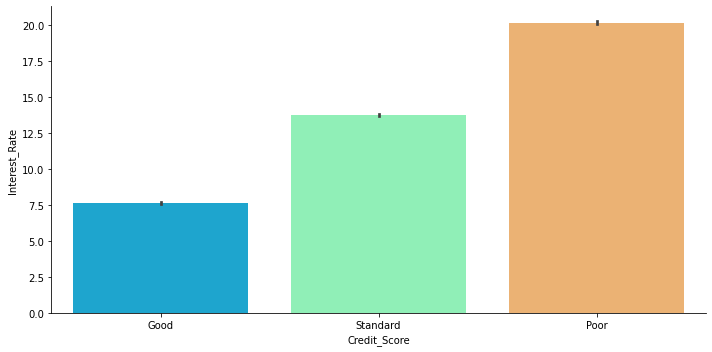

In [183]:
plt.figure(figsize=(12,4))
sns.catplot(x='Credit_Score', data=df_graph,y='Interest_Rate', aspect=2, kind='bar',palette = "rainbow")

#### This graph shows us that if customer has high interest rate there are more chances of them having a poor credit score

<AxesSubplot:xlabel='Num_Credit_Card', ylabel='Outstanding_Debt'>

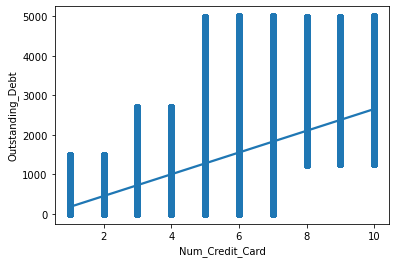

In [184]:
sns.regplot(x='Num_Credit_Card',y='Outstanding_Debt',data=df_graph)

#### From the Regression plot, we can infer that as the number of credit card increases the outstanding debt also increases

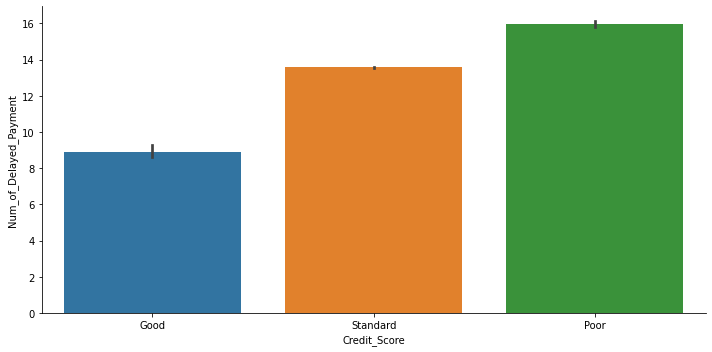

In [185]:
sns.catplot(y='Num_of_Delayed_Payment', data=df_graph, x='Credit_Score', aspect=2, kind='bar')

#### From the plot we can infer more number of delayed payments leads to a poor credit score. So make your payments on time!

<AxesSubplot:>

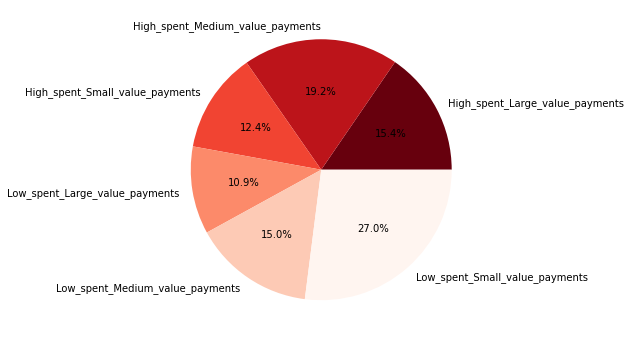

In [186]:
df_graph.groupby('Payment_Behaviour')['Payment_Behaviour'].count().\
                plot(kind='pie',figsize=(10,6),cmap="Reds_r", autopct='%1.1f%%', ylabel='')

#### From the above pie chart, highest proportion is of credit card users who have spent less and made payments of small amount. It is also true that only small proportion of credit card users have spent less but have made large payments. 

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

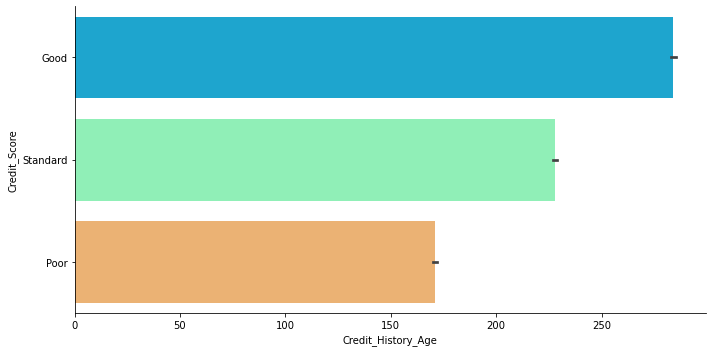

In [187]:
plt.figure(figsize=(12,4))
sns.catplot(y='Credit_Score', data=df_graph, x='Credit_History_Age', aspect=2, kind='bar', palette = 'rainbow')

#### The longer the credit history age the better the credit score!

In [188]:
#Creating temporary column for total number of loans for graph
df_graph['total_loans'] = df_clean['Auto Loan'] + df_clean['Credit-Builder Loan'] + df_clean['Not Specified'] +\
df_clean['Personal Loan'] + df_clean['Payday Loan'] + df_clean['Mortgage Loan'] + df_clean['Home Equity Loan']+\
df_clean['Debt Consolidation Loan']+ df_clean['Student Loan']

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

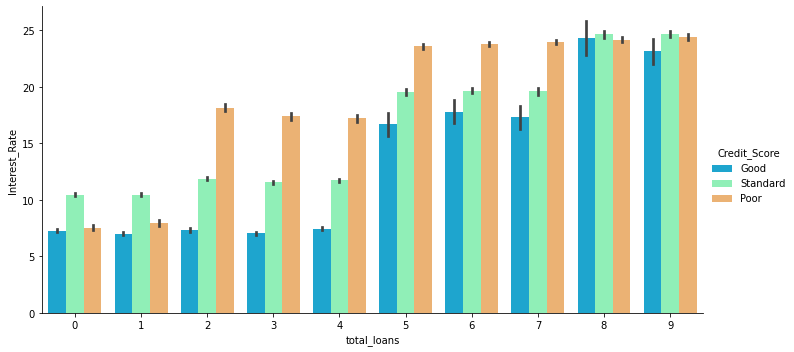

In [189]:
plt.figure(figsize=(12,4))
sns.catplot(x = 'total_loans',hue='Credit_Score', data=df_graph, y='Interest_Rate', aspect=2, kind='bar',palette = "rainbow")

#### From the above graph we can infer that higher the interest rate and higher the total number of loans higher the possibility of being a good credit scorer. 

<AxesSubplot:title={'center':'Occupation'}>

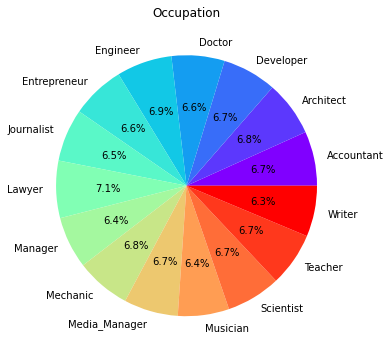

In [190]:
df_graph.groupby('Occupation')['Occupation'].count().\
                plot(kind='pie',figsize=(10,6),cmap="rainbow", autopct='%1.1f%%',ylabel='',title='Occupation')

#### From the pie chart we can say that all occupations have almost the same percentage of representation in our dataset

# Finding 1

In [191]:
oci = df_graph.groupby(['Occupation','Credit_Score']).agg({'Credit_Score':'size', 'Annual_Income':'mean'}).\
rename(columns = {'Credit_Score':'Size'})

In [192]:
oci = oci.reset_index()

In [193]:
oci = oci[['Occupation','Credit_Score','Annual_Income']]

In [194]:
oci

,Occupation,Credit_Score,Annual_Income
0,Accountant,Good,117132.975
1,Accountant,Poor,189195.324
2,Accountant,Standard,228440.397
3,Architect,Good,194009.630
4,Architect,Poor,146224.873
5,Architect,Standard,165472.711
6,Developer,Good,201040.389
7,Developer,Poor,175191.112
8,Developer,Standard,152617.870
9,Doctor,Good,165268.558


# Manager with highest average salary have a poorer credit score than managers with lesser salary. 

In [195]:
oci[oci.Occupation == 'Manager'].sort_values(by = 'Annual_Income',ascending = False)[0:3]

,Occupation,Credit_Score,Annual_Income
25,Manager,Poor,218147.029
26,Manager,Standard,149275.611
24,Manager,Good,127509.735


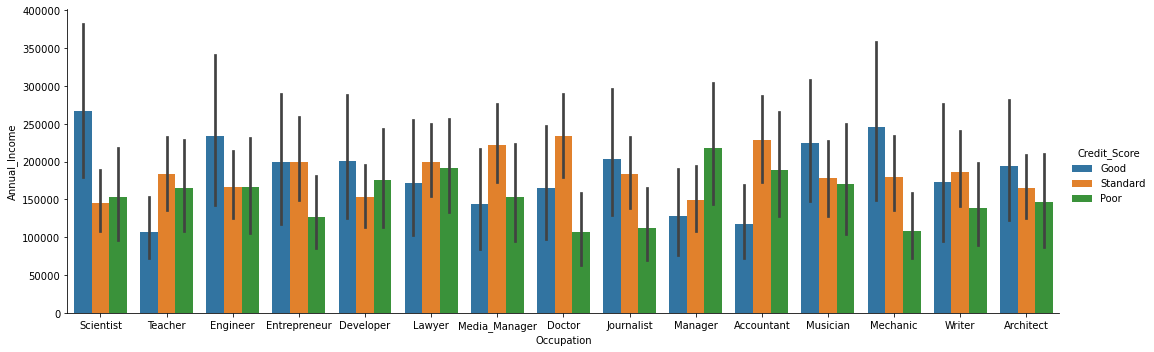

In [196]:
sns.catplot(y='Annual_Income', x='Occupation',hue='Credit_Score', data=df_graph, kind='bar',aspect=3)

#### Dropping all the unique row id columns

In [197]:
df_clean = df_clean.drop(columns = ['ID','Customer_ID','SSN_y'],axis = 1)

#### Few columns are string so converting all of them to float

In [198]:
df_clean = df_clean.astype(float)

#### Checking correlation to drop the highly correlated columns before tarinning decision tree

In [199]:
corr = df_clean.corr()
corr[corr<1].stack().nlargest(30)[::2]

Monthly_Inhand_Salary  Monthly_Balance        0.676
Credit_History_Age     Credit_Mix             0.634
Outstanding_Debt       Interest_Rate          0.629
Delay_from_due_date    Interest_Rate          0.589
Interest_Rate          Num_Bank_Accounts      0.585
Delay_from_due_date    Outstanding_Debt       0.572
                       Num_Bank_Accounts      0.560
Payment_of_Min_Amount  Interest_Rate          0.546
Outstanding_Debt       Num_Bank_Accounts      0.507
Payment_of_Min_Amount  Num_Bank_Accounts      0.506
Interest_Rate          Num_Credit_Card        0.499
Credit_Score           Credit_Mix             0.499
Outstanding_Debt       Num_Credit_Card        0.491
Delay_from_due_date    Num_Credit_Card        0.480
Outstanding_Debt       Changed_Credit_Limit   0.457
dtype: float64

# 5. Machine Learning

## 5.1 Decision Tree

#### We are droping columns that are redundant or highly correlated with other columns

In [200]:
X = df_clean.drop(columns=['Credit_Score','Credit_Mix','Monthly_Inhand_Salary','Changed_Credit_Limit','Num_Credit_Inquiries'])

In [201]:
Y = df_clean.Credit_Score

#### Splitting the dataset for trainning and testing

In [202]:
from sklearn.model_selection import train_test_split

In [203]:
# Create training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#### Trainning the model

In [204]:
dt = tree.DecisionTreeClassifier(max_depth=4)

In [205]:
#Fitting the decision tree
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4)

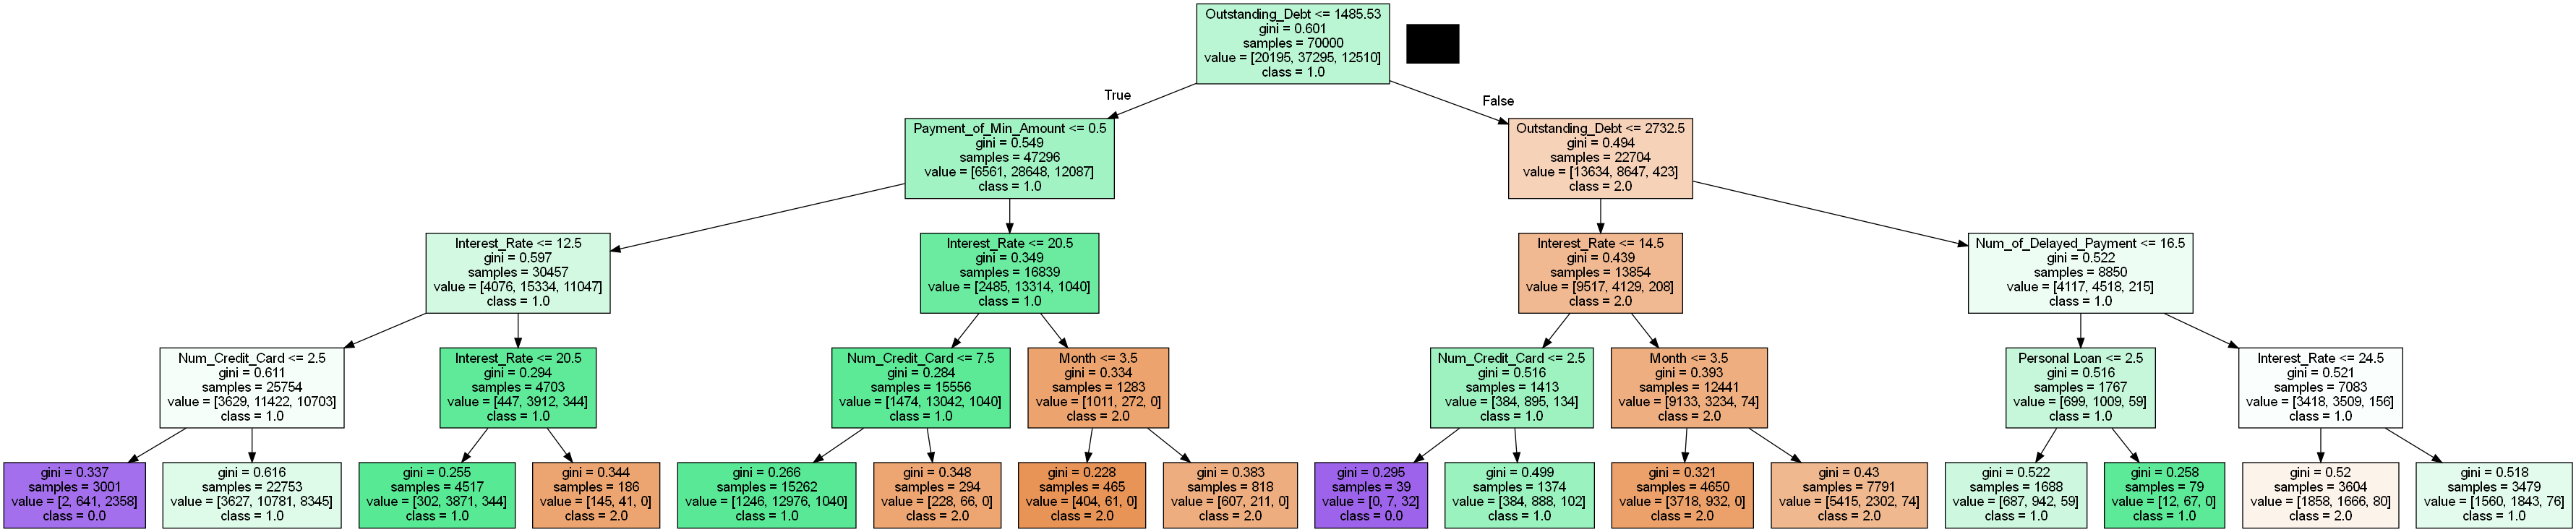

In [206]:
#plotting the tree
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', feature_names=dt_feature_names, class_names=dt_target_names, filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

Class 0: <b> Poor </b> Credit Score

Class 1:  <b>Standard </b> Credit Score

Class 2:  <b>Good </b> Credit Score

# Finding 2

In [207]:
df_graph.Outstanding_Debt = df_graph.Outstanding_Debt.astype(float)

In [208]:
df_graph['discretized_debt_EW']=pd.cut(df_graph.Outstanding_Debt, bins=[0, 1500, 2735, 4990])

In [209]:
df_graph['IR_Range']=df_graph.apply(lambda x: 1 if x.Interest_Rate>24.5 else 0, axis = 1)

IR_Range 0: Interest Rate less that 24.5

IR_Range 1: Interest Rate greater that 24.5

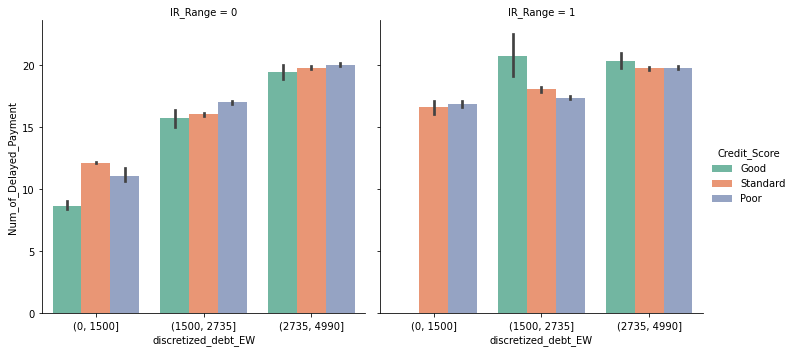

In [210]:
sns.factorplot(x='discretized_debt_EW',y='Num_of_Delayed_Payment', hue='Credit_Score', col = 'IR_Range', data=df_graph, kind='bar',palette='Set2')

# Higher the Outstanding Debt and Number of delayed payments with Lower Interest Rate, higher the probability of getting good credit score

In [211]:
#predicting
dt.predict(X_test)

array([0., 1., 1., ..., 1., 0., 0.])

In [212]:
#prediction accuracy
(dt.predict(X_test) == Y_test).mean()

0.6583

In [213]:
y_pred = dt.predict(X_test)

#### Predicting Probabilities

In [214]:
y_pred_proba = dt.predict_proba(X_test)

#### Confusion Matric 

In [215]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import sklearn.metrics as met
confusion_matrix(Y_test, y_pred)

array([[ 5387,  3416,     0],
       [ 2245, 13350,   284],
       [   70,  4236,  1012]], dtype=int64)

#### Accuracy

In [216]:
# Accuracy
(y_pred == Y_test).mean()

0.6583

#### Classification Report

In [217]:
met.classification_report(Y_test,y_pred,output_dict=True)

{'0.0': {'precision': 0.6994287198130356,
  'recall': 0.6119504714301942,
  'f1-score': 0.6527718873068766,
  'support': 8803},
 '1.0': {'precision': 0.6356537472621655,
  'recall': 0.8407330436425468,
  'f1-score': 0.7239500013557116,
  'support': 15879},
 '2.0': {'precision': 0.7808641975308642,
  'recall': 0.19029710417450169,
  'f1-score': 0.3060175385545812,
  'support': 5318},
 'accuracy': 0.6583,
 'macro avg': {'precision': 0.7053155548686885,
  'recall': 0.5476602064157475,
  'f1-score': 0.5609131424057231,
  'support': 30000},
 'weighted avg': {'precision': 0.6801084225253071,
  'recall': 0.6583,
  'f1-score': 0.6289784755174348,
  'support': 30000}}

#### Auc Score

In [218]:
#AUC Score
met.roc_auc_score(Y_test,y_pred_proba,multi_class='ovr')

0.805447133466795

#### The AUC Score for Decision Tree is 80%

## 5.2 Random Forest

In [219]:
#importing packages
from sklearn.ensemble import RandomForestClassifier

In [220]:
cl = RandomForestClassifier(random_state = 0)

#### Trainning the model

In [221]:
cl.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

#### Prediction

In [222]:
cl.predict(X_test)

array([0., 1., 1., ..., 2., 0., 1.])

In [223]:
#Accuracy
(cl.predict(X_test) == Y_test).mean()

0.8171

In [224]:
y_pred = cl.predict(X_test)
y_pred[:20]

array([0., 1., 1., 0., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1.,
       2., 2., 1.])

#### Predicting Probabilities

In [225]:
cl.predict_proba(X_test)[:, 1]

array([0.33, 0.65, 0.51, ..., 0.21, 0.26, 0.78])

In [226]:
y_pred_proba = cl.predict_proba(X_test)

#### Confusion Matrix

In [227]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[ 7396,  1388,    19],
       [ 1774, 13107,   998],
       [   18,  1290,  4010]], dtype=int64)

#### Accuracy

In [228]:
# Accuracy
(y_pred == Y_test).mean()

0.8171

#### Random Forest gives us 81.7% accuracy which is better than the decision tree.

#### Classification Report

In [229]:
met.classification_report(Y_test,y_pred,output_dict=True)

{'0.0': {'precision': 0.804962995211145,
  'recall': 0.8401681245030104,
  'f1-score': 0.8221888722138848,
  'support': 8803},
 '1.0': {'precision': 0.830345264491606,
  'recall': 0.8254298129605139,
  'f1-score': 0.8278802425467408,
  'support': 15879},
 '2.0': {'precision': 0.7976924607121544,
  'recall': 0.7540428732606242,
  'f1-score': 0.7752537457709038,
  'support': 5318},
 'accuracy': 0.8171,
 'macro avg': {'precision': 0.8110002401383017,
  'recall': 0.8065469369080495,
  'f1-score': 0.8084409535105098,
  'support': 30000},
 'weighted avg': {'precision': 0.8171090069257719,
  'recall': 0.8171,
  'f1-score': 0.8168812811169396,
  'support': 30000}}

#### Roc Score

In [230]:
met.roc_auc_score(Y_test,y_pred_proba,multi_class='ovr')

0.9305905016465686

#### The ROC Score for Random Forest is 93%

## 5.3 Clustering with K-means

In [231]:
#Importing Packages
from sklearn.cluster import KMeans

In [232]:
#Training Model
clu = KMeans(n_clusters=3, random_state=0)

In [233]:
df_clean.columns

Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Delay_from_due_date', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Occupation', 'Credit_Mix', 'Changed_Credit_Limit', 'Interest_Rate',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_Credit_Inquiries',
       'Num_of_Delayed_Payment', 'Auto Loan', 'Credit-Builder Loan',
       'Not Specified', 'Personal Loan', 'Payday Loan', 'Mortgage Loan',
       'Home Equity Loan', 'Debt Consolidation Loan', 'Student Loan',
       'Payment_Behaviour_Spent', 'Payment_Behaviour_Valuepayments'],
      dtype='object')

In [234]:
df_clus = df_clean.drop(columns=['Changed_Credit_Limit','Credit_Mix','Annual_Income'])

In [235]:
#Fitting the model
clu.fit(df_clus)

KMeans(n_clusters=3, random_state=0)

In [236]:
clu.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [237]:
df_clus['cluster']=clu.labels_

In [238]:
df_clus.groupby('cluster').mean()

,Month,Age,Monthly_Inhand_Salary,Delay_from_due_date,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation,Interest_Rate,Num_Bank_Accounts,Num_Credit_Card,Num_Credit_Inquiries,Num_of_Delayed_Payment,Auto Loan,Credit-Builder Loan,Not Specified,Personal Loan,Payday Loan,Mortgage Loan,Home Equity Loan,Debt Consolidation Loan,Student Loan,Payment_Behaviour_Spent,Payment_Behaviour_Valuepayments
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.503,32.756,2477.336,23.137,1613.081,31.802,206.096,0.591,225.495,547.813,314.383,0.808,7.962,15.993,5.757,5.793,11.777,14.393,0.418,0.450,0.431,0.429,0.445,0.426,0.429,0.430,0.426,1.410,0.000
1,4.493,33.499,4222.198,20.638,1369.804,32.347,226.141,0.514,54793.100,612.292,399.787,0.903,7.994,14.190,5.234,5.417,10.779,13.180,0.380,0.375,0.398,0.373,0.387,0.357,0.377,0.376,0.379,1.483,0.000
2,4.492,34.644,8427.146,16.022,971.625,33.468,258.302,0.357,341.235,862.930,595.650,1.085,7.928,10.970,4.420,4.902,15.876,11.077,0.285,0.295,0.311,0.291,0.312,0.301,0.298,0.284,0.301,1.621,0.000


# Finding 3

In [239]:
df_clean['discretized_AI_EW']=pd.cut(df_graph.Amount_invested_monthly, bins=[0, 548,611,862,10000])

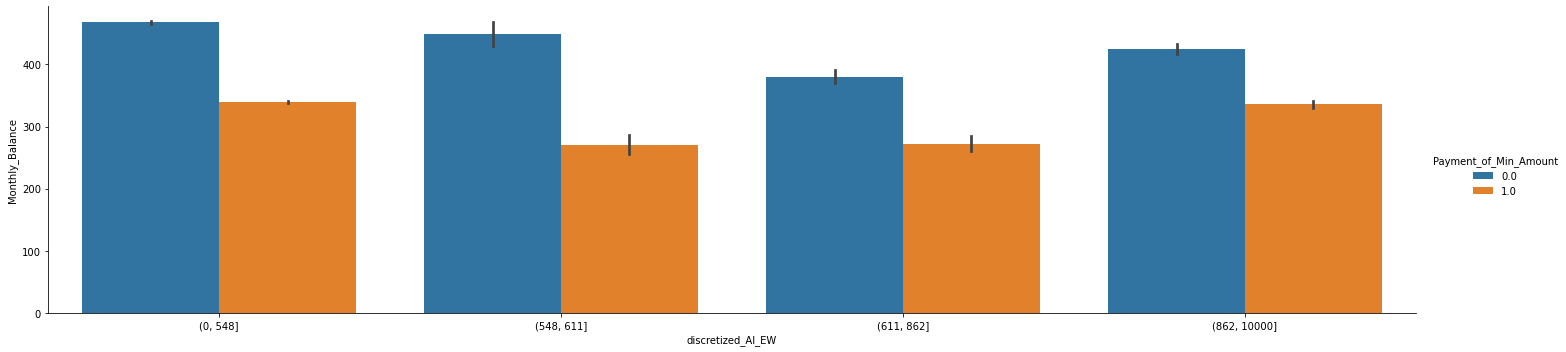

In [240]:
sns.catplot(y='Monthly_Balance', data=df_clean,x='discretized_AI_EW',hue='Payment_of_Min_Amount',aspect=4, kind='bar')

# People with higher Monthly Balance are interested in Investing More Rather than Paying their Minimum Credit Amount

# Finding 4

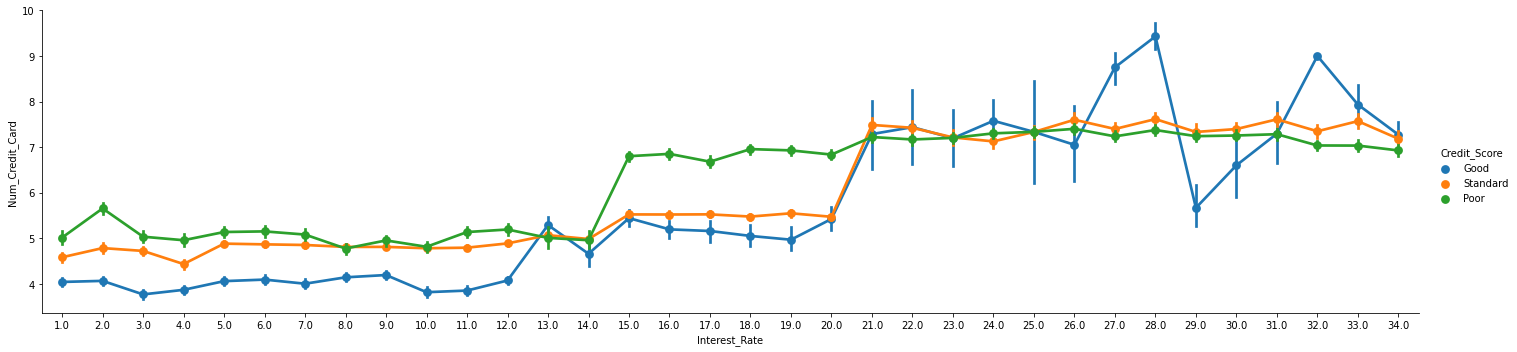

In [241]:
sns.catplot(x='Interest_Rate', data=df_graph,y='Num_Credit_Card',hue = 'Credit_Score',aspect=4, kind='point')

# There is more chance of you having a good credit score if you have Higher Number of credit card at Same or Higher Interest Rate

# 6. Interesting Findings 

<div class="alert alert-block alert-success"> 

<b>Finding 1:</b> Well paid Managers are not good at managing their money! 
Managers with higher average salary have poorer credit scores  than managers with lower average salary.

    
<b>Finding 2:</b> People are more interested in investing than paying their monthly balance even when it affects their Credit Score.

    
<b>Finding 3:</b> The higher the outstanding debt and higher the number of delayed payment, the higher is the credit score on the condition that you have a lower interest rate.

    
<b>Finding 4:</b> There is more chance of you having a good credit score if you have higher number of credit cards at Same or Higher Interest Rate. 
 </div>

# 7. Conclusions

<div class="alert alert-block alert-info"> 
    
* To Maintain a good credit score, make your payments on time. 


* Longer Credit History leads to better Credit Score. So start <b>EARLY!</b>


* Try to make credit card payments in full. Paying just the minimum due amount will not have a good impact on your credit score.

</div>